In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
char= pd.read_csv('char_with_roles.csv')

Filter the character dataframe to remove movies where there is no mention of character in summary

In [37]:
char_filtered=char
for i, movie_id in enumerate(char['Wiki ID'].unique()):
    characters=char_filtered[char_filtered['Wiki ID'] == movie_id]
    if all(characters['role'] == 0):
        char_filtered=char_filtered.drop(characters.index)

#### Plot random movies to get an idea of the distribution of number of character name mentions

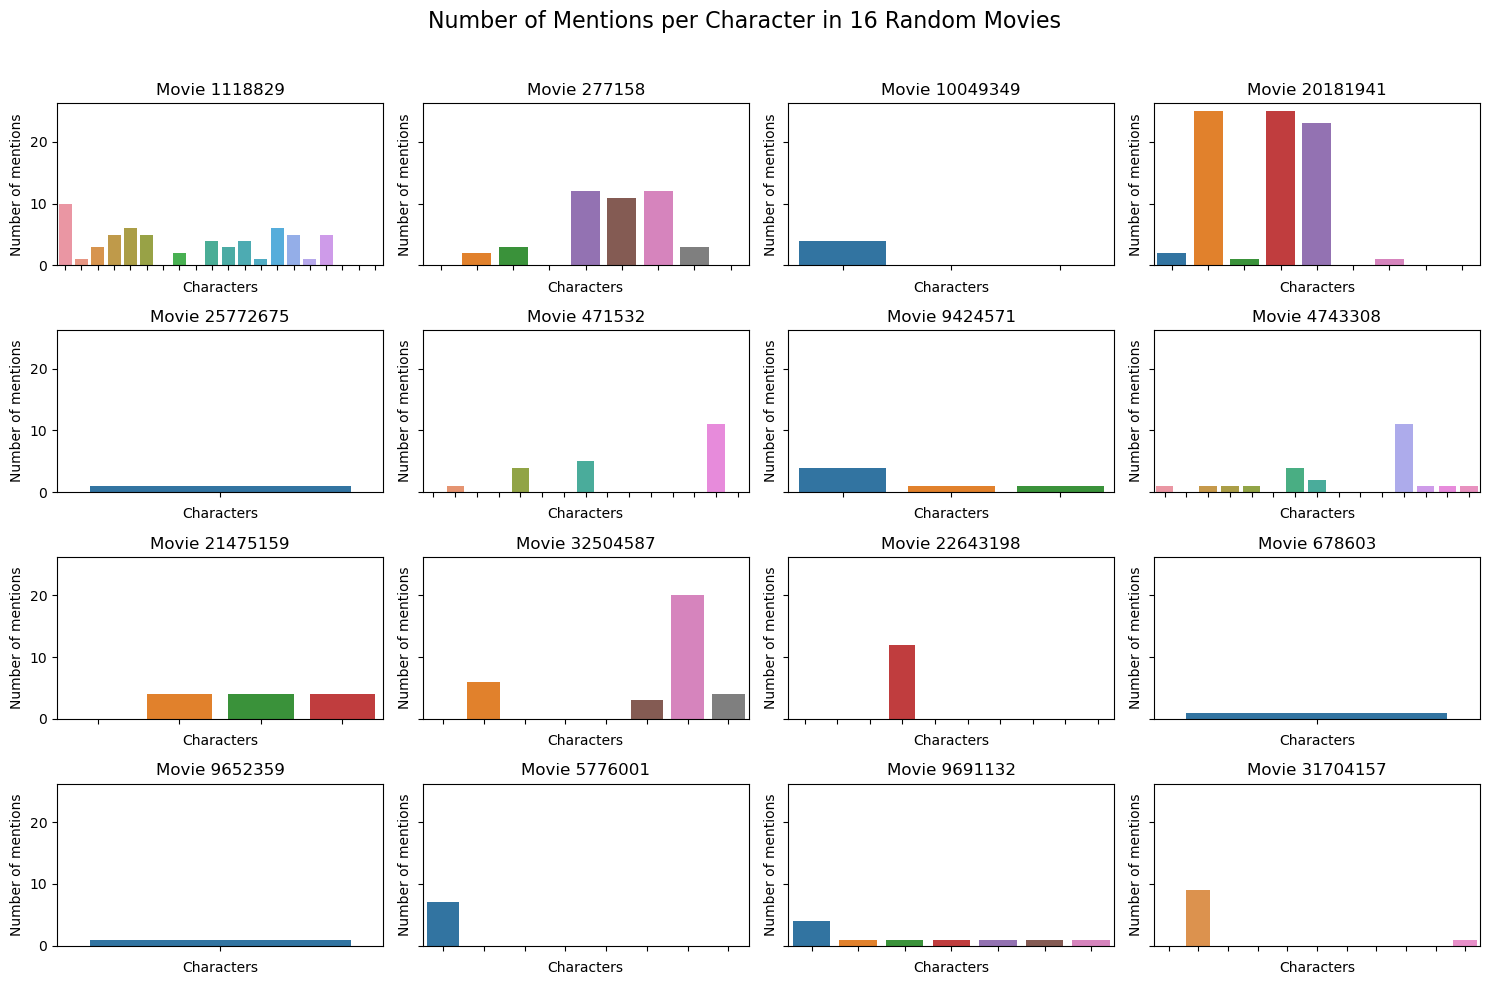

In [45]:
# Generate random Movie IDs
np.random.seed(49) 
random_movie_ids = np.random.choice(char_filtered['Wiki ID'].unique(), 16, replace=False)


fig, axes = plt.subplots(4, 4, figsize=(15, 10), sharey=True)
fig.suptitle('Number of Mentions per Character in 16 Random Movies', fontsize=16)
axes = axes.flatten()
for i, movie_id in enumerate(random_movie_ids):
    characters = char_filtered[char_filtered['Wiki ID'] == movie_id]
    sns.barplot(ax=axes[i], data=characters,x='char name', y='role', errorbar=None)
    axes[i].set_xticklabels([])
    axes[i].set_title(f'Movie {movie_id}')
    axes[i].set_xlabel('Characters')
    axes[i].set_ylabel('Number of mentions')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Our initial idea was to put the character roles in categories (lead role, secondary role or small role) depending on the number of time their name was mentionned in the summary compared to other charaters. However, we observe on the above plots that the distribution of name mentions is very different from movie to movie. For this reason, we decided not to categorize the roles since the ideal categories differ depending on the movie. This is because every summary varies in length and focus more or less on characters. To give information about the importance of a role in a movie, we put in the 'role' feature the proportion of mentions of the character name over the mentions of every character name in the movie. 